In [2]:
!pip install gdal
!pip install rasterio
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow

In [5]:
img = tif.imread("/content/L71221071_07120010720_DN.tif")

In [6]:
img.shape

(1233, 1520, 6)

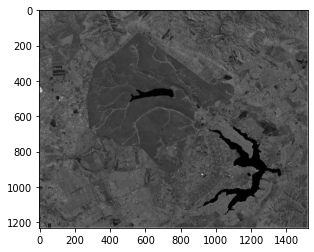

In [7]:
plt.imshow(img[:,:,3], cmap="Greys_r")

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

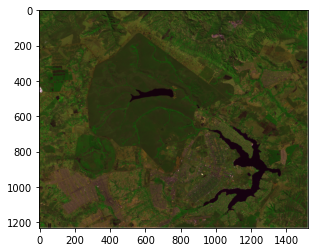

In [8]:
imshow(img, bands=(2,3,0))

In [9]:
from osgeo import gdal
import numpy as np
import rasterio
from rasterio.plot import show

In [10]:
img2 = gdal.Open("/content/L71221071_07120010720_DN.tif")

In [11]:
img3 = img2.ReadAsArray()

In [12]:
img3.shape

(6, 1233, 1520)

In [29]:
img3 = img3.swapaxes(0,1)

In [30]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

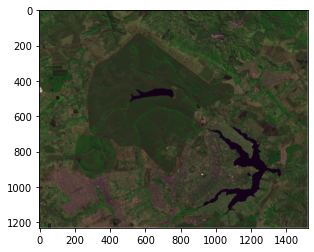

In [31]:
imshow(img3,(2,3,1))

In [32]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [33]:
stack = np.dstack([b1,b2,b4])

In [34]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

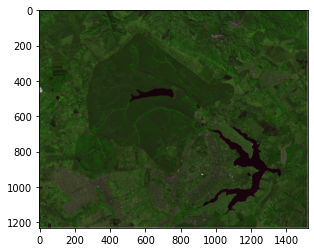

In [35]:
imshow(stack,(1,2,0))

In [36]:
rst = rasterio.open("/content/L71221071_07120010720_DN.tif")

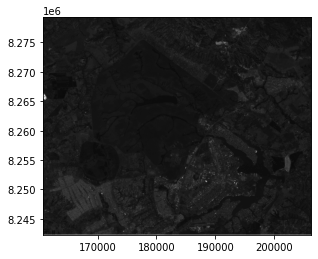

<AxesSubplot:>

In [37]:
show(rst, cmap=('Greys_r'))

In [38]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [39]:
stack = np.dstack([b1,b2,b4])

In [40]:
with rasterio.open("/content/L71221071_07120010720_DN.tif") as rst:
 b1 = rst.read(1)
 b2 = rst.read(2)
 b4 = rst.read(4)

stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

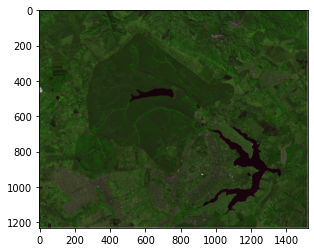

In [41]:
imshow(stack, (1,2,0))

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

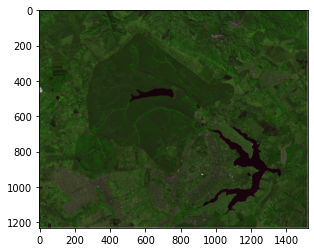

In [42]:
imshow(stack2, (1,2,0))